In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import sklearn
import imblearn
import image as Image

pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)


from sklearn import metrics, svm
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)


C:\Users\kruts\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
loans = pd.read_csv('Data/loan.csv')

In [3]:
loans.shape

(887379, 74)

In [4]:
loans.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358,"Borrower added on 12/21/11 > I plan on co

In [5]:
half_count = len(loans) * 0.7
loans = loans.drop(['url','desc'],axis = 1) 
loans = loans.dropna(thresh=half_count,axis=1) 


In [6]:
loans.shape

(887379, 52)

In [7]:
#Read the DataDictionary.csv and store it in a dataframe
data_dictionary = pd.read_csv('Data/DataDictionary.csv',encoding = 'ISO-8859-1')
data_dictionary.head(5)

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,collection_recovery_fee,post charge off collection fee


In [8]:
# Data dictionary has 80 columns and the columnname set to name and description
print(data_dictionary.shape[0]) 
data_dictionary.head()
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name',
                                                 'Description': 'description'})



80


In [9]:
#Create a dataframe and concatenate the dataframes loans and datadictionary to understand the name, datatype, firstvalue and description amongst them
loans_dtypes = pd.DataFrame(loans.dtypes,columns=['dtypes'])

In [10]:
loans_dtypes.head(5)

,dtypes
id,int64
member_id,int64
loan_amnt,float64
funded_amnt,float64
funded_amnt_inv,float64


In [11]:
loans_dtypes = loans_dtypes.reset_index()
loans_dtypes['name'] = loans_dtypes['index']
loans_dtypes = loans_dtypes[['name','dtypes']]

In [12]:
loans_dtypes['first value'] = loans.loc[0].values
preview = loans_dtypes.merge(data_dictionary, on='name',how='left')

In [13]:
#Check for the first 13 columns
preview[:13]

,name,dtypes,first value,description
0,id,int64,1077501,A unique LC assigned ID for the loan listing.
1,member_id,int64,1296599,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,float64,10.65,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


In [14]:
#Drop id — randomly generated field by Lending Club for unique identification purposes only.
#Drop member_id — also randomly generated field by Lending Club for identification purposes only.
#Drop funded_amnt — leaks information from the future(after the loan is already started to be funded).
#Drop funded_amnt_inv — also leaks data from the future.
#Drop sub_grade — contains redundant information that is already in the grade column (more below).
#Drop mp_title — requires other data and a lot of processing to become potentially useful 
drop_list = ['id','member_id','funded_amnt','funded_amnt_inv',
             'sub_grade','emp_title']
loans = loans.drop(drop_list,axis=1)

In [15]:
loans.shape #Number of Columns reduced to 46

(887379, 46)

In [16]:
#Check for the next 13 columns
preview[13:26]

,name,dtypes,first value,description
13,annual_inc,float64,24000,The self-reported annual income provided by the borrower during registration.
14,verification_status,object,Verified,NaN
15,issue_d,object,Dec-2011,The month which the loan was funded
16,loan_status,object,Fully Paid,Current status of the loan
17,pymnt_plan,object,n,Indicates if a payment plan has been put in place for the loan
18,purpose,object,credit_card,A category provided by the borrower for the loan request.
19,title,object,Computer,The loan title provided by the borrower
20,zip_code,object,860xx,The first 3 numbers of the zip code provided by the borrower in the loan application.
21,addr_state,object,AZ,The state provided by the borrower in the loan application
22,dti,float64,27.65,"A ratio calculated using the borrowers total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrowers self-reported monthly income."


In [17]:
# Drop issued_d — leaks data from the future.
# Drop zip_code - mostly redundant with the addr_state column since only the first 3 digits of the 5 digit zip code are visible.
drop_list = ['issue_d','zip_code']
loans = loans.drop(drop_list,axis=1)

In [18]:
loans.shape #Number of columns reduced to 44

(887379, 44)

In [19]:
#Check for the next 13 columns
preview[26:39]

,name,dtypes,first value,description
26,open_acc,float64,3,The number of open credit lines in the borrower's credit file.
27,pub_rec,float64,0,Number of derogatory public records
28,revol_bal,float64,13648,Total credit revolving balance
29,revol_util,float64,83.7,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."
30,total_acc,float64,9,The total number of credit lines currently in the borrower's credit file
31,initial_list_status,object,f,"The initial listing status of the loan. Possible values are  W, F"
32,out_prncp,float64,0,Remaining outstanding principal for total amount funded
33,out_prncp_inv,float64,0,Remaining outstanding principal for portion of total amount funded by investors
34,total_pymnt,float64,5861.07,Payments received to date for total amount funded
35,total_pymnt_inv,float64,5831.78,Payments received to date for portion of total amount funded by investors


In [20]:
loans.shape #Number of columns reduced to 44

(887379, 44)

In [21]:
#Drop out_prncp - leaks data from the future.
#Drop out_prncp_inv - also leaks data from the future.
#Drop total_pymnt - also leaks data from the future.
#Drop total_pymnt_inv - also leaks data from the future.
#Drop total_rec_prncp,total_rec_int,total_rec_late_fee - all of them leaks data from the future
drop_list = ['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv']
drop_list = ['total_rec_prncp','total_rec_int','total_rec_late_fee']
loans = loans.drop(drop_list,axis=1)

In [22]:
#Check for the last 13 columns
preview[39:52]

,name,dtypes,first value,description
39,recoveries,float64,0,post charge off gross recovery
40,collection_recovery_fee,float64,0,post charge off collection fee
41,last_pymnt_d,object,Jan-2015,Last month payment was received
42,last_pymnt_amnt,float64,171.62,Last total payment amount received
43,next_pymnt_d,object,NaN,Next scheduled payment date
44,last_credit_pull_d,object,Jan-2016,The most recent month LC pulled credit for this loan
45,collections_12_mths_ex_med,float64,0,Number of collections in 12 months excluding medical collections
46,policy_code,float64,1,publicly available policy_code=1\r\nnew products not publicly available policy_code=2
47,application_type,object,INDIVIDUAL,Indicates whether the loan is an individual application or a joint application with two co-borrowers
48,acc_now_delinq,float64,0,The number of accounts on which the borrower is now delinquent.


In [23]:
#Drop 'recoveries', 'collection_recovery_fee','next_pymnt_d', 'last_pymnt_d', 'last_pymnt_amnt'-leaks data from the future
            
drop_list = ['recoveries', 'collection_recovery_fee','next_pymnt_d', 'last_pymnt_d',
             'last_pymnt_amnt']
loans = loans.drop(drop_list,axis=1)

In [24]:
loans.shape #Number of columns reduced to 36

(887379, 36)

In [25]:
preview[preview.name == 'loan_status']

,name,dtypes,first value,description
16,loan_status,object,Fully Paid,Current status of the loan


In [26]:
#After narrowing down the variables to 36 from 74.
# 'loan_amnt' is the listed amount of the loan applied for by the borrower. 
#If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
loans.loan_amnt.describe()

count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

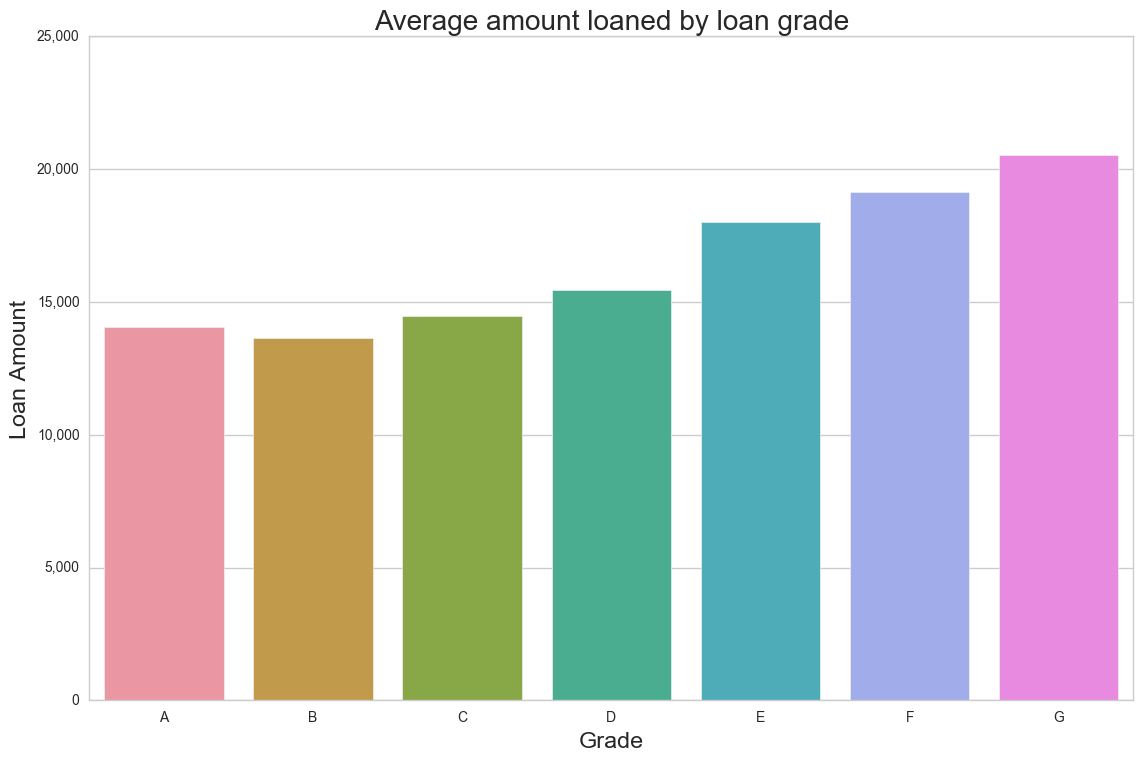

In [27]:
group = loans.groupby('grade').agg([np.mean])
loan_amt_mean = group['loan_amnt'].reset_index()

plt.style.use('fivethirtyeight')

sns.set_style("whitegrid")
ax = sns.barplot(y = "mean", x = 'grade', data=loan_amt_mean)
ax.set(xlabel = 'Grade', ylabel = 'Loan Amount', title = 'Average amount loaned by loan grade')
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.savefig('Images\\LoanAmountbyGrade.png')


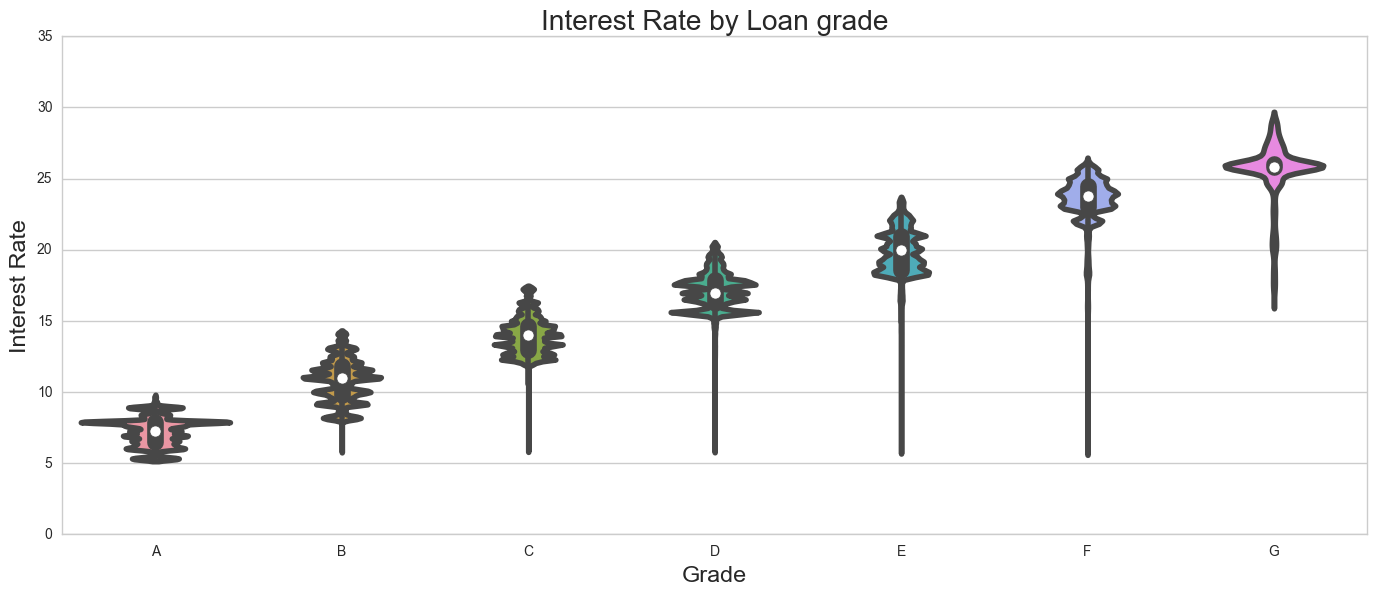

In [28]:
plt.subplots(figsize=(15,6))
ax= sns.violinplot(x="grade", y="int_rate", data=loans, order="ABCDEFG")
ax.set(xlabel = 'Grade', ylabel = 'Interest Rate', title = 'Interest Rate by Loan grade')
plt.savefig('Images\\InterestRatebyGrade.png')

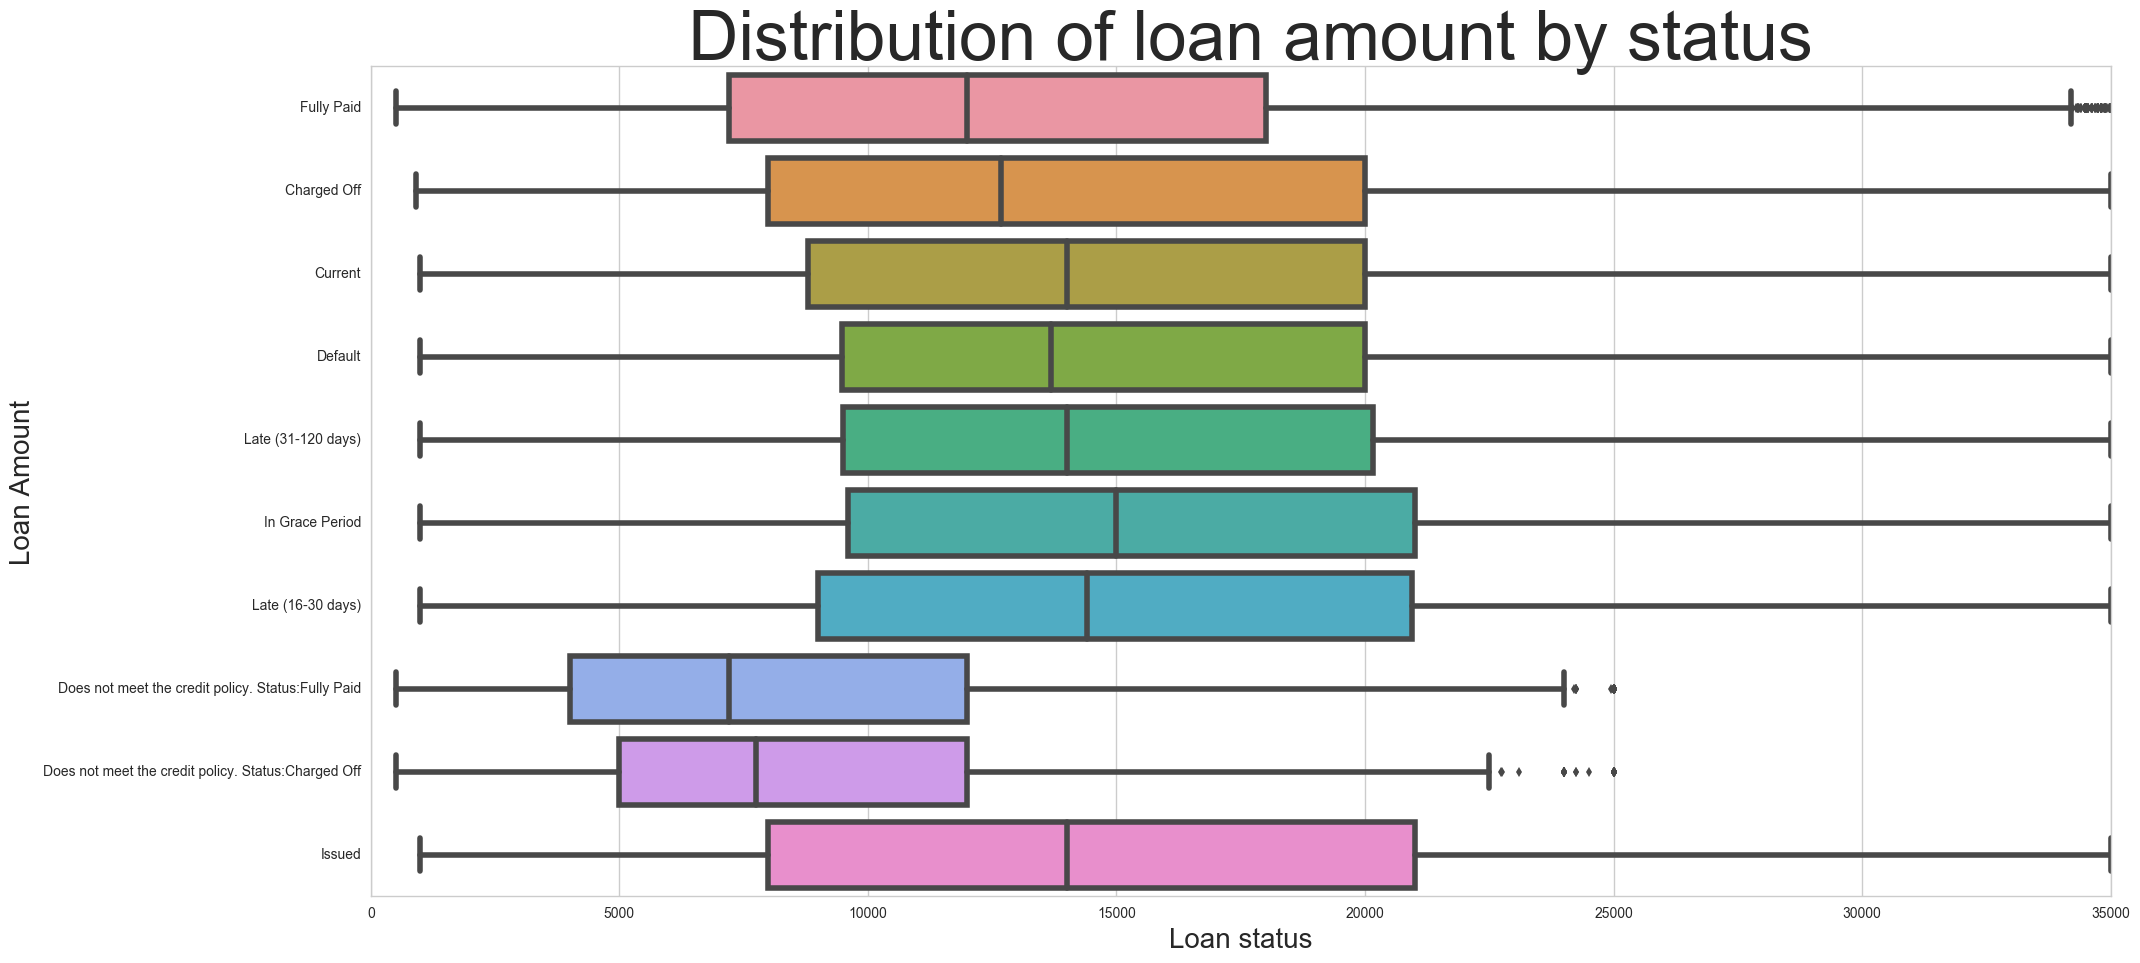

In [29]:
#Loan amount by the loan status

plt.subplots(figsize=(20,10))
plt.title(" Distribution of loan amount by status").set_size(50)

bplot =sns.boxplot(x="loan_amnt", y="loan_status", data=loans)
bplot.set_ylabel("Loan Amount", fontname="Arial", fontsize=20)
bplot.set_xlabel("Loan status", fontname="Arial", fontsize=20)
plt.savefig('Images\\LoanAmountbyStatus.png')

In [30]:
loans["loan_status"].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [31]:
#create a dataset which has the meaning of the loan status with their count 
meaning = [
    "Loan is up to date on current payments.",
    "Loan has been fully paid off.",
    "Loan for which there is no longer a reasonable expectation of further payments.",
    "Loan hasn't been paid in 31 to 120 days (late on the current payment).",
    "Loan has been issued",
    "The loan is past due but still in the grace period of 15 days.",
    "Loan hasn't been paid in 16 to 30 days (late on the current payment).",
     "While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
    "While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
    "Loan is defaulted on and no payment has been made for more than 121 days."]

status, count = loans["loan_status"].value_counts().index, loans["loan_status"].value_counts().values

loan_statuses_explanation = pd.DataFrame({'Loan Status': status,'Count': count,'Meaning': meaning})[['Loan Status','Count','Meaning']]
loan_statuses_explanation


,Loan Status,Count,Meaning
0,Current,601779,Loan is up to date on current payments.
1,Fully Paid,207723,Loan has been fully paid off.
2,Charged Off,45248,Loan for which there is no longer a reasonable expectation of further payments.
3,Late (31-120 days),11591,Loan hasn't been paid in 31 to 120 days (late on the current payment).
4,Issued,8460,Loan has been issued
5,In Grace Period,6253,The loan is past due but still in the grace period of 15 days.
6,Late (16-30 days),2357,Loan hasn't been paid in 16 to 30 days (late on the current payment).
7,Does not meet the credit policy. Status:Fully Paid,1988,"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
8,Default,1219,"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
9,Does not meet the credit policy. Status:Charged Off,761,Loan is defaulted on and no payment has been made for more than 121 days.


In [32]:
#Take into consideration only the 'fully paid' and 'charged off' loan status 
loan_status = loans[(loans["loan_status"] == "Fully Paid") |
                            (loans["loan_status"] == "Charged Off")| (loans["loan_status"] == "Current")
                            |(loans["loan_status"] == "Late (31-120 days)")|
                             (loans["loan_status"] == "Issued")]


In [33]:
loans["loan_status"].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

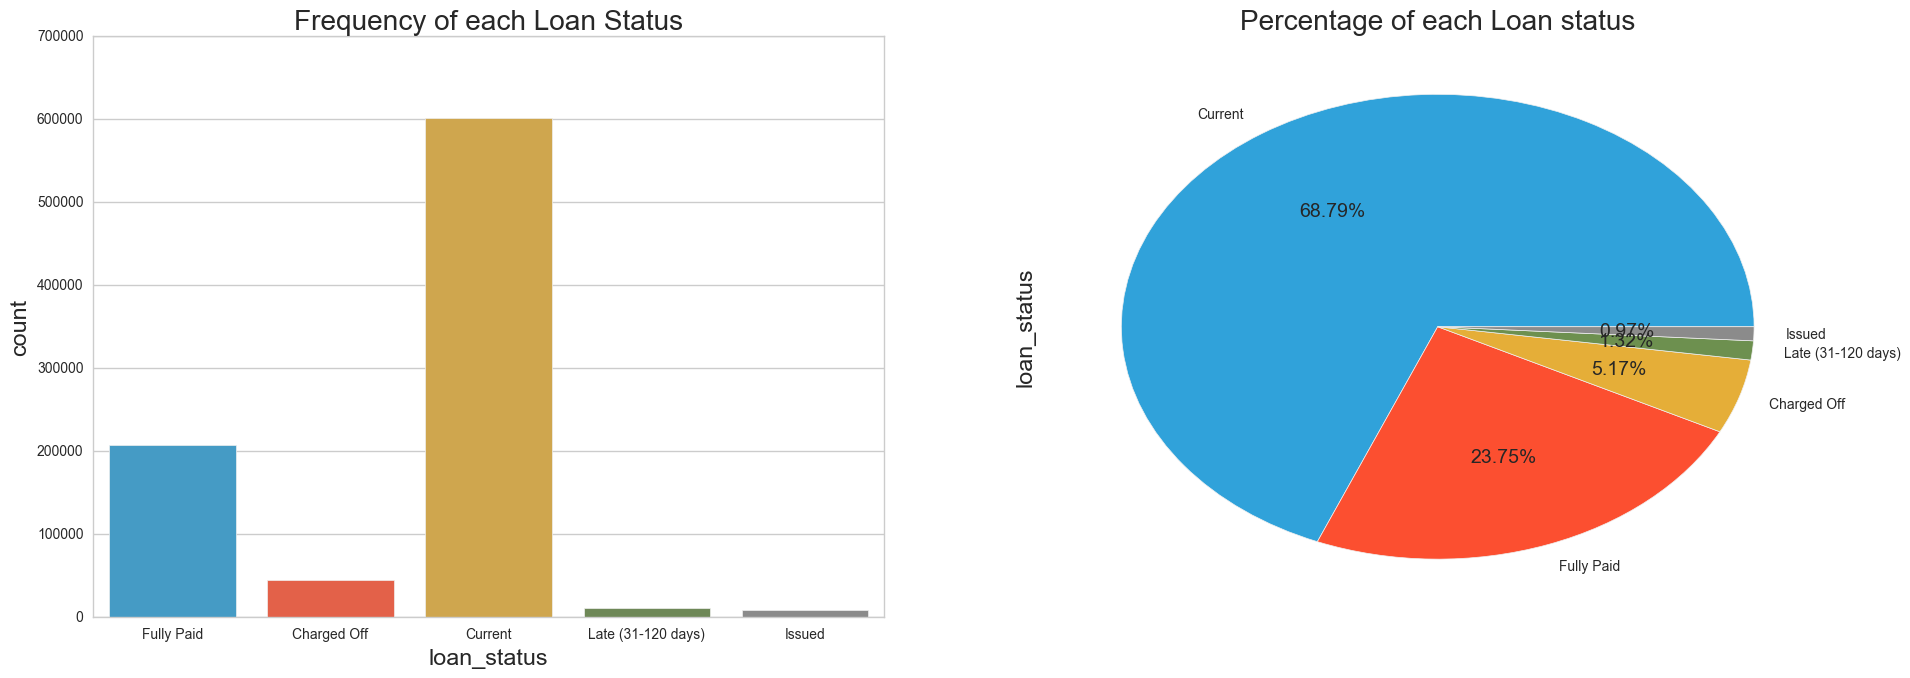

<function matplotlib.pyplot.close>

In [34]:
#Percentage of loan status
fig, axs = plt.subplots(1,2,figsize=(20,7))
sns.countplot(x='loan_status',data=loan_status,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loan_status.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()
plt.savefig('Images\\PercentageofLoanStatus.png')
plt.close

In [35]:
# make temporary dataframe in order to keep original dataframe
loans_copy = loans.copy()
loans_copy["emp_length"] = ["0.5" if x == '< 1 year' else x for x in loans_copy["emp_length"]]

# check employment length
loans_copy.emp_length.unique()



array(['10+ years', '0.5', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a'],
      dtype=object)

In [36]:
#using regex fetch only the integer part of the values
import re
reg = re.compile(r'(\d+\.?\d?)')

t = []
for emp in loans_copy.emp_length:
    result = reg.match(emp)
    if result:
        value = result.group(1)
    t.append(value)
loans_copy['emp'] = t
    

In [37]:
f = pd.value_counts(loans_copy['emp']).to_frame().reset_index()
f.columns = ['type','count']

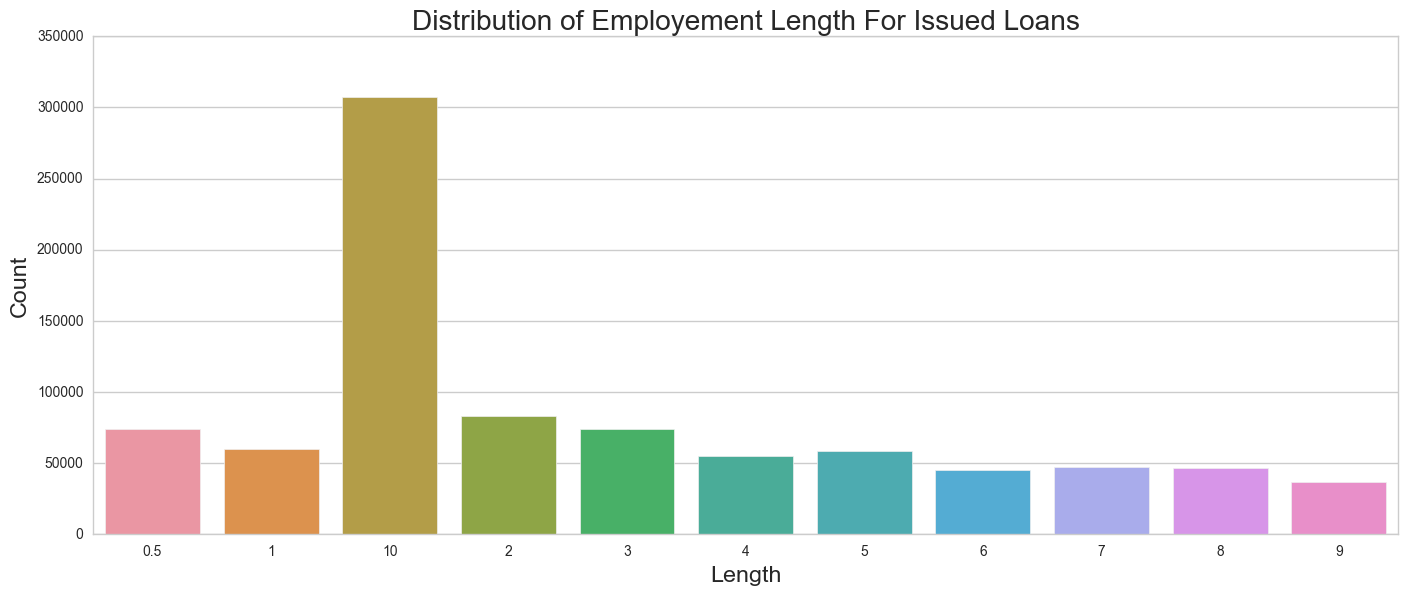

In [38]:
plt.subplots(figsize=(15,6))
sns.barplot(y='count', x='type', data=f)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Issued Loans")
plt.show()
plt.savefig('Images\\Distribution.png')

In [39]:
#Remove the columns with unique values
loans = loans.loc[:,loans.apply(pd.Series.nunique) != 1]

In [40]:
#Drop columns with more than one unique values but one of the values has insignificant frequency in the dataset
for col in loans.columns:
    if (len(loans[col].unique()) < 4):
        print(loans[col].value_counts())
        print()


 36 months    621125
 60 months    266254
Name: term, dtype: int64

Source Verified    329558
Verified           291071
Not Verified       266750
Name: verification_status, dtype: int64

n    887369
y        10
Name: pymnt_plan, dtype: int64

f    456848
w    430531
Name: initial_list_status, dtype: int64

INDIVIDUAL    886868
JOINT            511
Name: application_type, dtype: int64



In [41]:
#Drop 'pymnt_plan' as it has two unique values 'y' and 'n' with 'y' occuring only once.
print(loans.shape[1])
loans = loans.drop(['pymnt_plan'],axis=1)
loans = loans.drop(['application_type'],axis = 1)
print("We've been able to reduced the features to => {}".format(loans.shape[1]))


35
We've been able to reduced the features to => 33


In [42]:
#Write the dataframe into a csv
loans.to_csv("Output\\processed_data_loans.csv",index = False)

In [43]:
#Preparing the features for machine learning
filtered_loans = pd.read_csv('Output\\processed_data_loans.csv', encoding = 'ISO-8859-1')
print(filtered_loans.shape)
filtered_loans.head()


(887379, 33)


,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,Jan-2016,0.0,0.0,NaN,NaN,NaN
1,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,Sep-2013,0.0,0.0,NaN,NaN,NaN
2,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,Jan-2016,0.0,0.0,NaN,NaN,NaN
3,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,personel,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,Jan-2015,0.0,0.0,NaN,NaN,NaN
4,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Current,other,Personal,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,Jan-2016,0.0,0.0,NaN,NaN,NaN


In [44]:
#Check for the columns with null values
null_counts = filtered_loans.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                        0
home_ownership                    0
annual_inc                        4
verification_status               0
loan_status                       0
purpose                           0
title                           151
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      502
total_acc                        29
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv           

In [46]:
#Drop columns with maximum null values
filtered_loans = filtered_loans.drop(['tot_coll_amt','tot_cur_bal','total_rev_hi_lim'],axis=1)
filtered_loans = filtered_loans.dropna()

In [47]:
#Check for the data type and the count of values in each column
print("Data types and their frequency\n{}".format(filtered_loans.dtypes.value_counts()))

Data types and their frequency
float64    18
object     12
dtype: int64


In [48]:
#Look for the columns with data type as object as those need to be converted to numeric 
object_columns_df = filtered_loans.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

term                     36 months
grade                            B
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
loan_status             Fully Paid
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
initial_list_status              f
last_credit_pull_d        Jan-2016
Name: 0, dtype: object


In [49]:
#Following columns represent categorical values, check for their unique values
cols = ['home_ownership', 'grade','verification_status', 'emp_length', 'term', 'addr_state','initial_list_status']
for name in cols:
    print(name,':')
    print(object_columns_df[name].value_counts(),'\n')

home_ownership :
MORTGAGE    443169
RENT        355788
OWN          87379
OTHER          180
NONE            44
ANY              3
Name: home_ownership, dtype: int64 

grade :
B    254352
C    245655
A    148105
D    139375
E     70607
F     23000
G      5469
Name: grade, dtype: int64 

verification_status :
Source Verified    329332
Verified           290835
Not Verified       266396
Name: verification_status, dtype: int64 

emp_length :
10+ years    291341
2 years       78794
< 1 year      70477
3 years       69969
1 year        57020
5 years       55663
4 years       52491
n/a           44798
7 years       44555
8 years       43919
6 years       42917
9 years       34619
Name: emp_length, dtype: int64 

term :
 36 months    620487
 60 months    266076
Name: term, dtype: int64 

addr_state :
CA    129421
NY     74001
TX     71088
FL     60865
IL     35456
NJ     33223
PA     31363
OH     29610
GA     29041
VA     26234
NC     24700
MI     22976
MD     21011
MA     20552
AZ     20393


In [50]:
#Unique values in the columns 'purpose' and 'title'
for name in ['purpose','title']:
    print("Unique Values in column: {}\n".format(name))
    print(filtered_loans[name].value_counts(),'\n')

Unique Values in column: purpose

debt_consolidation    523869
credit_card           206058
home_improvement       51733
other                  42772
major_purchase         17250
small_business         10358
car                     8843
medical                 8521
moving                  5405
vacation                4723
house                   3704
wedding                 2344
renewable_energy         575
educational              408
Name: purpose, dtype: int64 

Unique Values in column: title

Debt consolidation                         413829
Credit card refinancing                    164285
Home improvement                            40059
Other                                       31853
Debt Consolidation                          15748
Major purchase                              12038
Business                                     6725
Medical expenses                             6661
Car financing                                5562
Consolidation                                537

In [51]:
#earliest_cr_line and last_credit_pull_d columns contain date values
#that would require a good amount of feature engineering for them to be potentially useful
#columns 'addr_state' and 'title' contains too many unique values , hence drop them
drop_cols = ['last_credit_pull_d','addr_state','title','earliest_cr_line']
filtered_loans = filtered_loans.drop(drop_cols,axis=1)

In [52]:
#Create dictionary to map the ordinal values in 'emp_length' and 'grade' to numerice values

mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0

    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    },
     "loan_status":{
        "Current":1,                                           
        "Fully Paid" :2,                                            
        "Charged Off":3,                                             
        "Late (31-120 days)":4,                                    
        "Issued":5,                                                  
        "In Grace Period":6,                                         
        "Late (16-30 days)":7,                                      
        "Does not meet the credit policy. Status:Fully Paid":8,       
        "Default":9,                                                  
        "Does not meet the credit policy. Status:Charged Off":10       
    }
}

filtered_loans = filtered_loans.replace(mapping_dict)


In [53]:
filtered_loans[['emp_length','grade','loan_status']].head()

,emp_length,grade,loan_status
0,10,2,2
1,0,3,3
2,10,3,2
3,10,3,2
4,1,2,1


In [54]:
#Map 'purpose' to numeric values 
purpose_dict = {
        "purpose" : {
        "debt_consolidation" :1,
        "credit_card" :2,
        "home_improvement":3,
        "major_purchase":4,
        "small_business":5,
        "car":6,
        "medical":7,
        "moving":8,
        "wedding":9,
        "house":10,
        "vacation":11,
        "educational":12,
        "renewable_energy":13,
        "other":14
        }
}

In [55]:
filtered_loans = filtered_loans.replace(purpose_dict)
filtered_loans.head(5)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,collections_12_mths_ex_med,acc_now_delinq
0,5000.0,36 months,10.65,162.87,2,10,RENT,24000.0,Verified,2,2,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,0.0,0.0
1,2500.0,60 months,15.27,59.83,3,0,RENT,30000.0,Source Verified,3,6,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,0.0,0.0
2,2400.0,36 months,15.96,84.33,3,10,RENT,12252.0,Not Verified,2,5,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,0.0,0.0
3,10000.0,36 months,13.49,339.31,3,10,RENT,49200.0,Source Verified,2,14,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,0.0,0.0
4,3000.0,60 months,12.69,67.79,2,1,RENT,80000.0,Source Verified,1,14,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,0.0,0.0


In [56]:
# For the nominal values in the following columns,
#use pandas' get_dummies() method to return a new DataFrame containing a new column for each dummy variable
#Use the concat() method to add these dummy columns back to the original DataFrame
nominal_columns = ["home_ownership", "verification_status", "term","initial_list_status"]
dummy_df = pd.get_dummies(filtered_loans[nominal_columns])
filtered_loans = pd.concat([filtered_loans, dummy_df], axis=1)
filtered_loans = filtered_loans.drop(nominal_columns, axis=1)

In [57]:
filtered_loans.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,collections_12_mths_ex_med,acc_now_delinq,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,term_ 36 months,term_ 60 months,initial_list_status_f,initial_list_status_w
0,5000.0,10.65,162.87,2,10,24000.0,2,2,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,2500.0,15.27,59.83,3,0,30000.0,3,6,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,2400.0,15.96,84.33,3,10,12252.0,2,5,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,10000.0,13.49,339.31,3,10,49200.0,2,14,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,3000.0,12.69,67.79,2,1,80000.0,1,14,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [58]:
filtered_loans.shape

(886563, 35)

In [59]:
#Store the processed and cleaned data into a csv
filtered_loans.to_csv("Output\\processed_cleaned_data_loans.csv", index = False)

In [60]:
#Read the processed and cleaned csv for machine learning
loans_prediction = pd.read_csv('Output\\processed_cleaned_data_loans.csv',encoding = 'ISO-8859-1')

In [61]:
#Store the loan_status values in y for prediction
y = loans_prediction['loan_status']
X = loans_prediction.drop(['loan_status'], axis=1)

In [62]:
# Split the data into 70% train and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [63]:
n_classes = 10

In [64]:
LABELS = [
        "Current",                                           
        "Fully Paid" ,                                            
        "Charged Off",                                             
        "Late (31-120 days)",                                    
        "Issued",                                                  
        "In Grace Period",                                         
        "Late (16-30 days)",                                      
        "Does not meet the credit policy. Status:Fully Paid",       
        "Default",                                                  
        "Does not meet the credit policy. Status:Charged Off"
]

In [65]:
#Using Decision Tree Classification, get the Accuracy score for likelihood of borrowers who will pay off the loan 
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_train,y_train)

print("Decision tree - Normal data set")
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print(metrics.confusion_matrix(y_test, dt.predict(X_test)))

Decision tree - Normal data set
0.931943196387549
[[172012     19      0   4031    939   2349    916      0    409      0]
 [    21  60875    876      0      0      5      0    193      0     13]
 [     0    807  12636      0      0      0      0     11      0     69]
 [  3136      2      0    219      9     57     38      0     21      0]
 [   825      1      0     15   1624     20      5      0      1      0]
 [  1741      5      0     88     18     38     14      0      8      0]
 [   646      0      0     27      2     15      3      0      2      0]
 [     0    214     14      0      0      0      0    335      0     29]
 [   337      0      0     29      0      8      2      0      9      0]
 [     0     22     66      0      0      0      0     26      0    117]]


In [67]:
confusion_matrix_DC = metrics.confusion_matrix(y_test, dt.predict(X_test))

In [68]:
normalised_confusion_matrix_DC = np.array(confusion_matrix_DC, dtype=np.float32)/np.sum(confusion_matrix_DC)*100

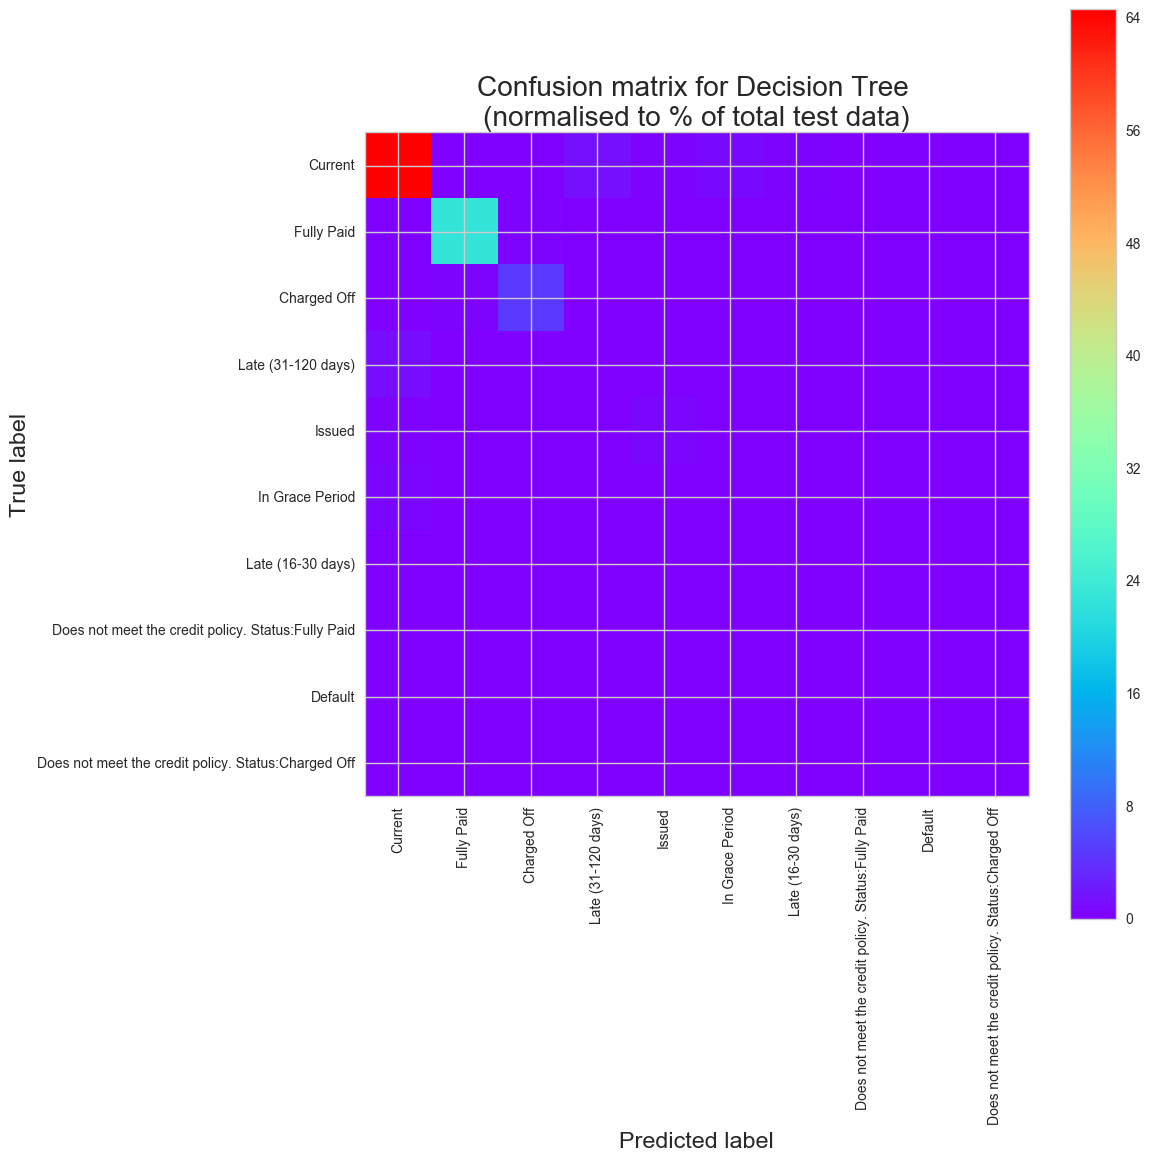

In [78]:
#plot Results: 
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.imshow(
    normalised_confusion_matrix_DC, 
    interpolation='nearest', 
    cmap=plt.cm.rainbow
)
plt.title("Confusion matrix for Decision Tree \n(normalised to % of total test data)")
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
plt.savefig('Images/DecisionTree_CM.png')

In [70]:
#Using Random Forest Classification, get the Accuracy score for likelihood of borrowers who will pay off the loan 
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

print("Random Forest - Normal data set")
print(metrics.accuracy_score(y_test, clf.predict(X_test)))
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print("\n")

Random Forest - Normal data set
0.9594426418116397
[[179778     20      0      3    873      1      0      0      0      0]
 [     0  61792    158      0      0      0      0     33      0      0]
 [     0   1201  12315      0      0      0      0      1      0      6]
 [  3465      2      0      0     15      0      0      0      0      0]
 [  1465      1      0      1   1023      1      0      0      0      0]
 [  1879      5      0      0     28      0      0      0      0      0]
 [   692      0      0      0      3      0      0      0      0      0]
 [     0    363      8      0      0      0      0    219      0      2]
 [   383      0      0      0      2      0      0      0      0      0]
 [     0     33    122      0      0      0      0     21      0     55]]




In [73]:
confusion_matrix_RF = metrics.confusion_matrix(y_test, clf.predict(X_test))

In [74]:
normalised_confusion_matrix_RF = np.array(confusion_matrix_RF, dtype=np.float32)/np.sum(confusion_matrix_RF)*100

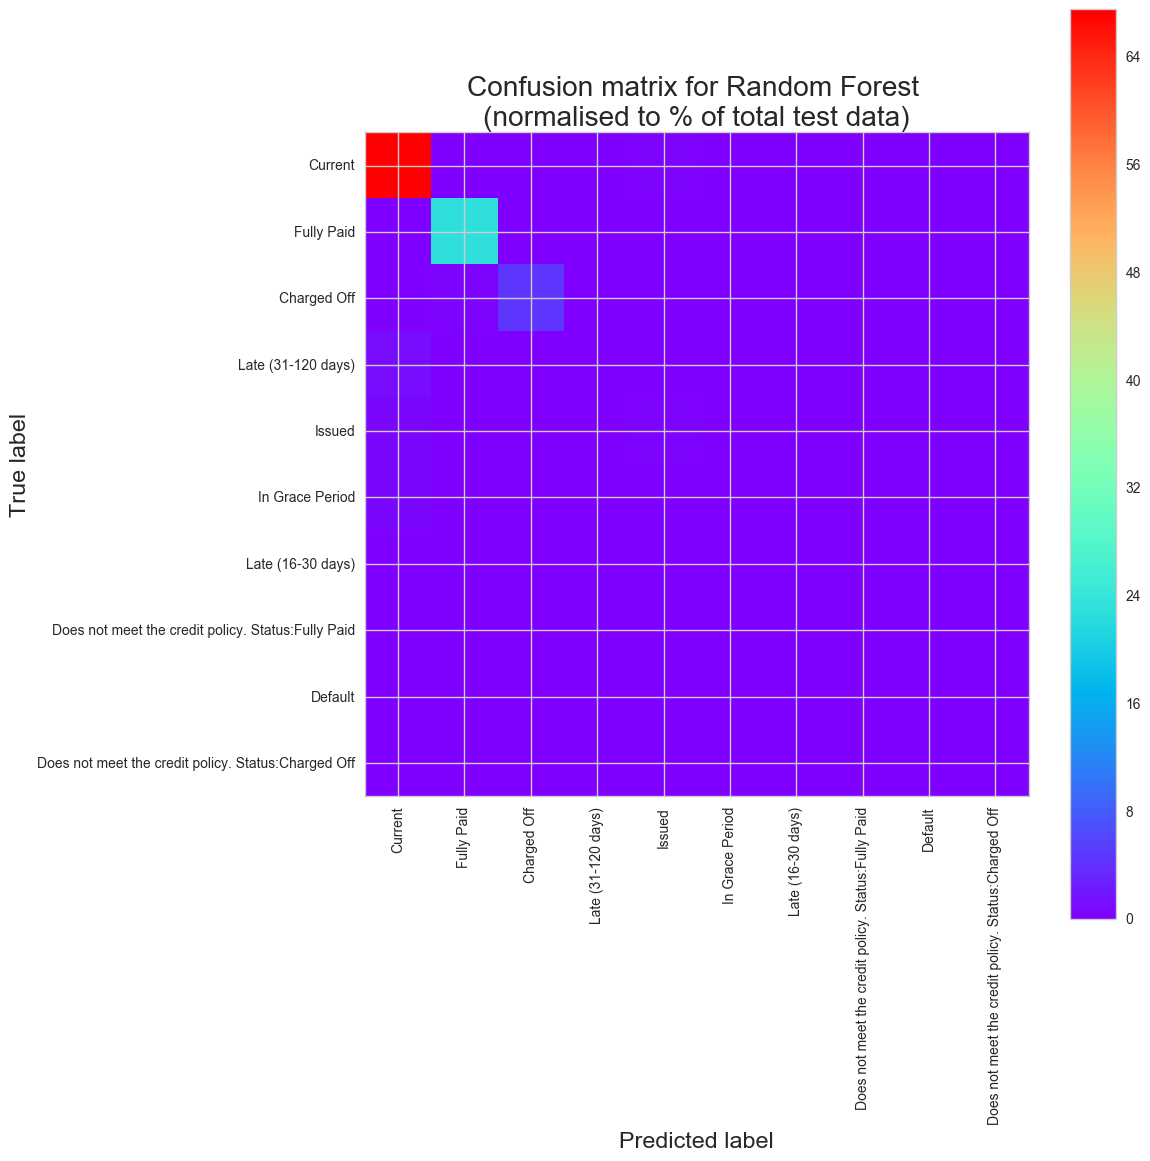

In [77]:
#plot Results: 
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.imshow(
    normalised_confusion_matrix_RF, 
    interpolation='nearest', 
    cmap=plt.cm.rainbow
)
plt.title("Confusion matrix for Random Forest \n(normalised to % of total test data)")
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
plt.savefig('Images/RandomForest_CM.png')